In [1]:
import anndata as ad
import scanpy as sc
import seaborn as sns
from sklearn.decomposition import PCA
from umap import UMAP

In [2]:
adata = ad.read_h5ad("adata.h5ad")
adata

AnnData object with n_obs × n_vars = 665 × 24175
    obs: 'sequenced_by', 'name', 'country', 'lat', 'long', 'collector', 'cs_number', 'admixture_group'

In [3]:
adata.obs

,sequenced_by,name,country,lat,long,collector,cs_number,admixture_group
accession_id,,,,,,,,
108,Monsanto,LDV-18,FRA,48.5167,-4.06667,Valerie Le Corre,CS77013,western_europe
139,Monsanto,LDV-46,FRA,48.5167,-4.06667,Valerie Le Corre,CS77014,western_europe
159,Monsanto,MAR2-3,FRA,47.3500,3.93333,Valerie Le Corre,CS77070,western_europe
265,Monsanto,PYL-6,FRA,44.6500,-1.16667,Valerie Le Corre,CS77198,admixed
350,Monsanto,TOU-A1-88,FRA,46.6667,4.11667,Fabrice Roux,CS77382,western_europe
...,...,...,...,...,...,...,...,...
10017,MPI,ICE21 / Petro-1,SRB,44.3400,21.46000,NaN,CS76370,central_europe
10018,MPI,ICE36 / Dobra-1,SRB,44.8400,20.16000,NaN,CS76369,central_europe
10020,MPI,Jl-2,CZE,49.1700,16.50000,NaN,CS76956,central_europe


In [4]:
adata.obs["total_counts"] = adata.X.sum(axis=1)

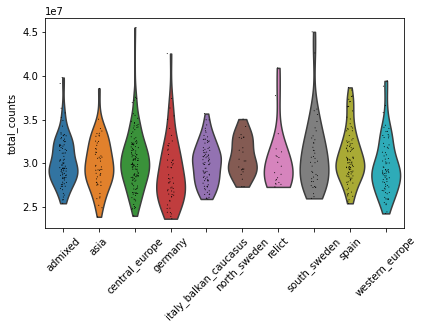

In [5]:
sc.pl.violin(adata, "total_counts", groupby='admixture_group', rotation=45)

In [6]:
#sc.pp.normalize_total(adata, target_sum=1e4)  # it's already normalized, but I'm not sure we can trust it

In [7]:
sc.pp.log1p(adata)

In [8]:
marker_genes = ["AT2G27120", "AT1G47920", "AT1G78330", "AT2G47680", "AT3G54460", "AT5G63120", "AT1G09860", "AT4G03050", "AT1G04880", "AT4G39590",]

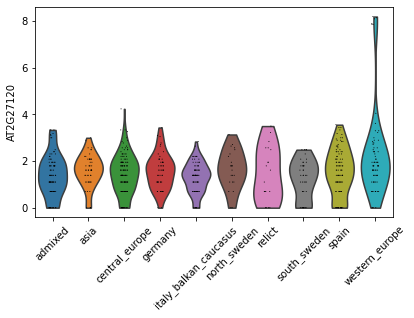

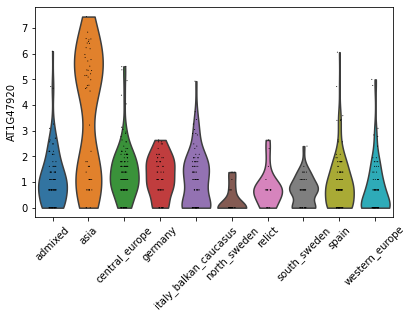

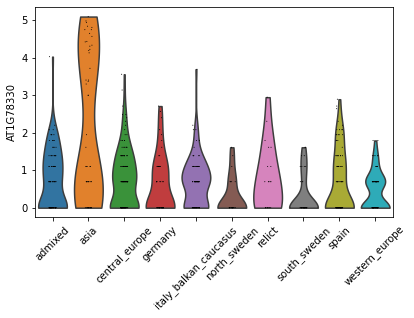

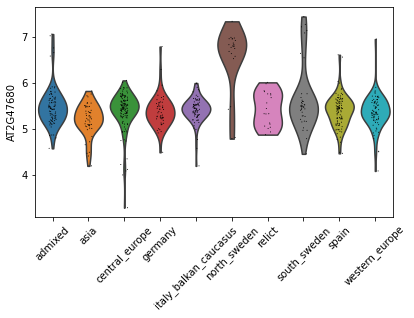

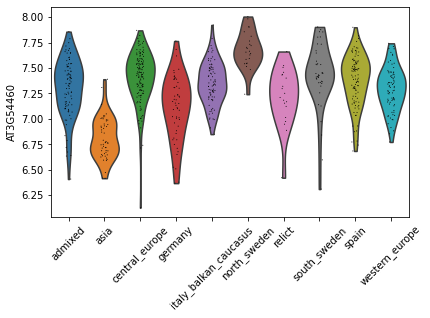

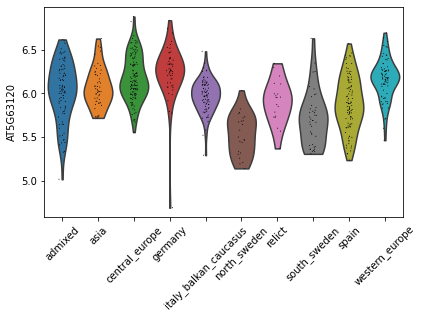

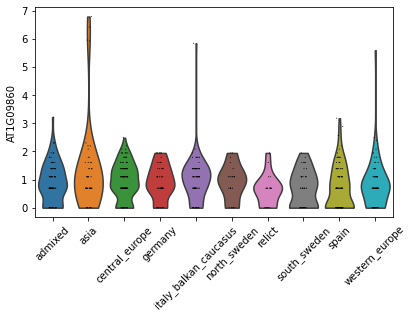

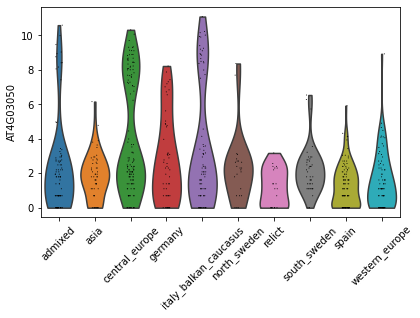

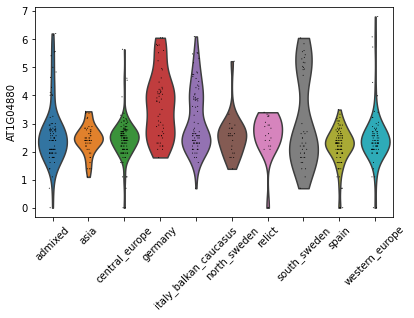

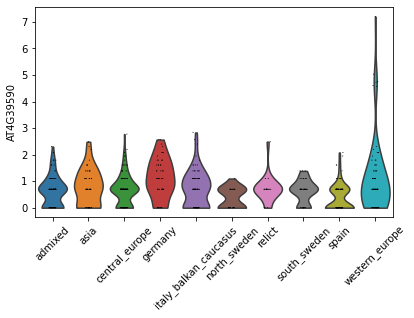

In [9]:
for marker_gene in marker_genes:
    sc.pl.violin(adata, marker_gene, groupby='admixture_group', rotation=45)

In [10]:
sc.pp.highly_variable_genes(adata)
adata = adata[:, adata.var.highly_variable]
adata

View of AnnData object with n_obs × n_vars = 665 × 1220
    obs: 'sequenced_by', 'name', 'country', 'lat', 'long', 'collector', 'cs_number', 'admixture_group', 'total_counts'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'admixture_group_colors', 'log1p', 'hvg'

In [11]:
adata.obs.loc[:, ["UMAP1", "UMAP2"]] = UMAP().fit_transform(PCA(n_components=20).fit_transform(adata.X))

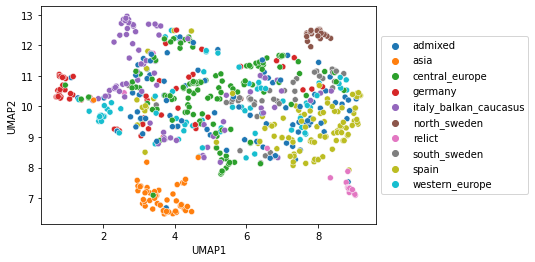

In [12]:
g = sns.scatterplot(data=adata.obs, x="UMAP1", y="UMAP2", hue="admixture_group")
g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1);

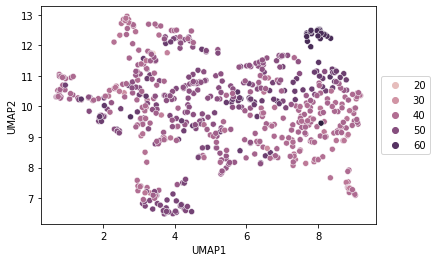

In [13]:
g = sns.scatterplot(data=adata.obs, x="UMAP1", y="UMAP2", hue="lat")
g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1);

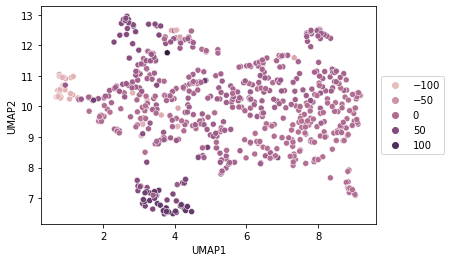

In [14]:
g = sns.scatterplot(data=adata.obs, x="UMAP1", y="UMAP2", hue="long")
g.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1);